In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

2022-12-27 01:39:07.658994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 01:39:07.826235: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-27 01:39:08.611122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-27 01:39:08.611202: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

'2.10.0'

In [2]:
datasets = keras.datasets

In [3]:
print(dir(datasets))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'boston_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [4]:
mydata = datasets.fashion_mnist

In [5]:
print(dir(mydata))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'load_data']


In [6]:
data = mydata.load_data()

In [7]:
len(data)

2

In [8]:
len(data[1])

2

In [9]:
len(data[0][0]), len(data[0][1]), len(data[1][0]), len(data[1][1])

(60000, 60000, 10000, 10000)

In [10]:
(xtrain, ytrain), (xtest, ytest) = data

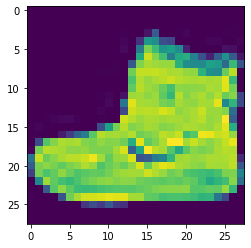

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(xtrain[0])


In [12]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
xtrain[0].min(), xtrain[0].max()

(0, 255)

In [14]:
xtrain = xtrain/255.0
xtest = xtest/ 255.0

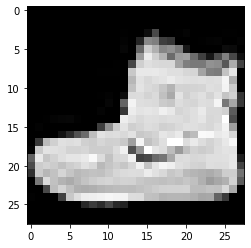

In [15]:
plt.figure()
plt.imshow(xtrain[0], cmap='gray')

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
[ class_names[i] for i in ytrain[:10] ]

['Ankle boot',
 'T-shirt/top',
 'T-shirt/top',
 'Dress',
 'T-shirt/top',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal']

In [17]:
print(class_names[ytrain[0]])

Ankle boot


In [18]:
xtrain[0].shape

(28, 28)

In [19]:
from tensorflow.keras.layers import Dense, Flatten

In [20]:
d_in = Flatten(input_shape=(28,28))
d_h1 = Dense(1024)
d_out = Dense(10)

In [21]:
m1 = keras.Sequential([d_in, d_h1, d_out])

2022-12-27 01:39:11.085285: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-27 01:39:11.085352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shantanu1): /proc/driver/nvidia/version does not exist
2022-12-27 01:39:11.086640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
lossFN = 'sparse_categorical_crossentropy'
optimizerFN = keras.optimizers.Adam(lr=0.001)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
m1.compile(loss=lossFN, optimizer=optimizerFN)

In [24]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [25]:
m1.fit(xtrain, ytrain, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 4.9772
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 4.8153
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 4.9600
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 4.0121
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 2.4351
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3011
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3010
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3008
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3008
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3005
Epoch 11/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3005
Epoch 12/50
469/469 [==============================] - 1s 3ms/step - loss: 2.3005
Epoch 13/50
469/469 [====

In [26]:
d_in2 = Flatten(input_shape=(28,28))
d_h12 = Dense(2048)
d_out2 = Dense(10)
m2 = keras.Sequential([d_in2, d_h12, d_out2])


In [27]:
d_in3 = Flatten(input_shape=(28,28))
d_h13 = Dense(1024, activation='relu')
d_h23 = Dense(2048 , activation='relu')
d_out3 = Dense(10, activation='softmax')
m3 = keras.Sequential([d_in3, d_h13, d_h23, d_out3])
m3.compile(loss=lossFN, optimizer=optimizerFN)

In [28]:
m2.compile(loss=lossFN, optimizer=optimizerFN)


In [29]:
m3.fit(xtrain, ytrain, epochs=50, verbose=0, batch_size=128)

In [30]:
p1 = m1.predict(xtest)
#p2 = m2.predict(xtest)
p3 = m3.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
import numpy as np
p_1 = [ np.argmax(px) for px in p1]
#p_2 = [ np.argmax(px) for px in p2]
p_3 = [ np.argmax(px) for px in p3]

In [33]:
accuracy_score (p_1, ytest)

0.1195

In [34]:
#accuracy_score (p_2, ytest)

In [35]:
accuracy_score (p_3, ytest)

0.8848